# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Dataset

In [16]:
data = pd.read_csv("consolidated_coin_data.csv", thousands=",")
data.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752.0,824588509
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224.0,853213342
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097.0,817872179
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567.0,828296390
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667.0,879181680


## Checking Dtypes

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  float64
 4   Low         28944 non-null  float64
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  float64
 7   Market Cap  28944 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.8+ MB


## Datatype Transformation

In [18]:
data["Date"] = data["Date"].astype("datetime64")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  float64       
 3   High        28944 non-null  float64       
 4   Low         28944 non-null  float64       
 5   Close       28944 non-null  float64       
 6   Volume      28944 non-null  float64       
 7   Market Cap  28944 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.8+ MB


In [20]:
data["Currency"].value_counts()

tezos           2412
binance-coin    2412
tether          2412
cardano         2412
xrp             2412
eos             2412
stellar         2412
bitcoin-cash    2412
ethereum        2412
bitcoin         2412
bitcoin-sv      2412
litecoin        2412
Name: Currency, dtype: int64

# Selecting Data

In [52]:
eth_data = data[data["Currency"] == "ethereum"]
ltc_data = data[data["Currency"] == "litecoin"]

## Lineplot

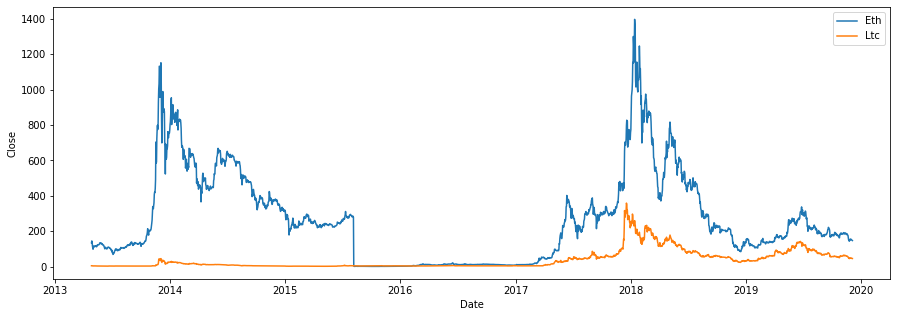

In [54]:
plt.figure(figsize=(15, 5))
sns.lineplot(x="Date", y="Close", data=eth_data)
sns.lineplot(x="Date", y="Close", data=ltc_data)
plt.legend(("Eth", "Ltc"))

## Barplot

In [55]:
data.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680


In [56]:
currency_close = data.groupby(by="Currency").max()["Close"]

In [57]:
closed_df = currency_close.reset_index()
closed_df.head()

,Currency,Close
0,binance-coin,50.32
1,bitcoin,19497.40
2,bitcoin-cash,3923.07
3,bitcoin-sv,238.34
4,cardano,44.73


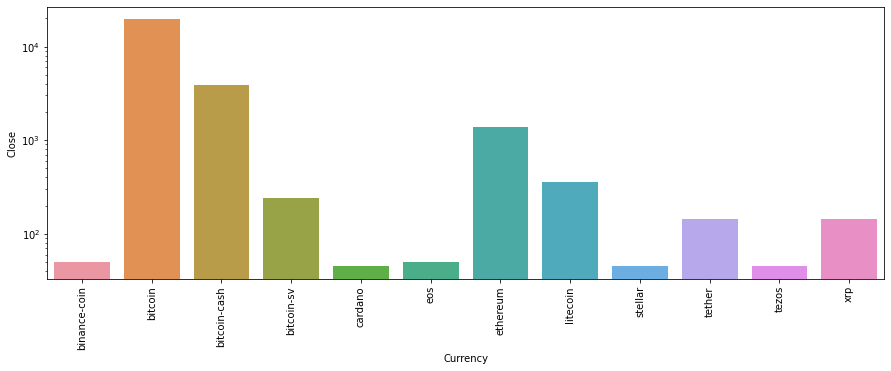

In [101]:
plt.figure(figsize=(15,5))
bar_plot = sns.barplot(x="Currency", y="Close", data=closed_df)
bar_plot.set_yscale("log")
plt.xticks(rotation="vertical")
plt.show()

# Pie Chart

In [98]:
volume_data = data.groupby(by="Currency").mean()["Volume"]
volume_data.head()

Currency
binance-coin    5.626652e+07
bitcoin         3.599158e+09
bitcoin-cash    3.622093e+08
bitcoin-sv      6.945699e+07
cardano         4.004766e+07
Name: Volume, dtype: float64

<AxesSubplot:ylabel='Volume'>

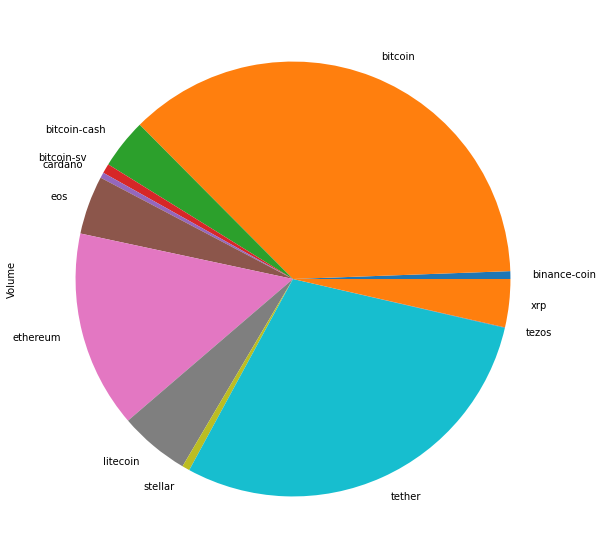

In [100]:
plt.figure(figsize=(10, 10))
volume_data.plot.pie()